## The dataset is about airline passenger satisfaction survey.
In this case can be the goal to reach a the highest customer satisfaction rate of the companies history, therefore it's nessecsary to analyse which factor positivly collarate with the customers satisaction (dissatisfaction). This can help the company make decisions regarding the customer service, prices, gate location, Ease of Online booking and more.

![image.png](attachment:0e35e8b3-c62f-431e-bdb5-d0ba11b21029.png)

# Data Overview

In [175]:
#Data Manipulation libraries
import pandas as pd
import numpy as np

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning libraries
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression ,  Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score
from sklearn.svm import SVC

In [176]:
df_airline_train = pd.read_csv('train.csv')
df_airline_test = pd.read_csv('test.csv')

In [177]:
df_airline_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


The train dataset contains 103904 rows and 25 columns. Here are the columns listed with all their contents. Two columns not listed here are the id and Unnamed. Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal custome)

Age: The actual age of the passeners

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Tavel)

Class: Travel class in the plane of the passengers (Business, Eco, Eo Plus)

Flight distance: The flight distance of ths journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Appicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival tme convenient

Ease of Online booking: Satisfaction level o online booking

Gate location: Satisfaction leve of Gate location

Food and drink: Satisfaction levl of Food and drink

Online boarding: Satisfaction leel of online boarding

Seat comfort: Satisfactin level of Seat comfort

Inflight entertainment: Satisfaction levelof inflight entertainment

On-board service: Satisfactin le el of On-board service

Leg room service: Satisfacion level of Leg room service

Baggage handling: Satisfction level of baggage handling

Check-in service: Satifaction level of Check-in service

Inflight service: Saisfaction level of inflight service

Cleanlinss: Satisfaction level of Cleanliness

Departure Delay inMinutes: Minutes delayed when departure

Arrival Dela in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)l or dissatisfaction)el(Satisfaction, neutral or dissatisfaction)



In [178]:
df_airline_train.shape

(103904, 25)

In [179]:
df_airline_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [180]:
df_airline_train.describe(include = 'object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [181]:
df_airline_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Data PreProcessing

In [182]:
df_airline_train.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [183]:
df_airline_test.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


There are some missing values found in the column Arrival Delay in Minutes. So we will fill those values with using median method

In [184]:
# Fill missing values in 'Arrival Delay in Minutes' with the median
df_airline_train['Arrival Delay in Minutes'].fillna(df_airline_train['Arrival Delay in Minutes'].median(), inplace=True)
df_airline_test['Arrival Delay in Minutes'].fillna(df_airline_test['Arrival Delay in Minutes'].median(), inplace=True)

<ipython-input-184-971894554dfc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airline_train['Arrival Delay in Minutes'].fillna(df_airline_train['Arrival Delay in Minutes'].median(), inplace=True)
<ipython-input-184-971894554dfc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [185]:
df_airline_train.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [186]:
df_airline_test.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


## Exploratory Data Analysis

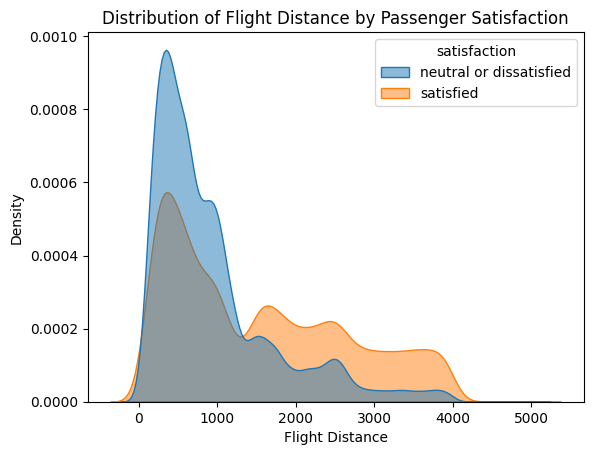

In [187]:
# KDE plot for Flight Distance by Satisfaction
sns.kdeplot(data=df_airline_train, x="Flight Distance", hue="satisfaction", fill=True, common_norm=False, alpha=0.5)

plt.title("Distribution of Flight Distance by Passenger Satisfaction")
plt.xlabel("Flight Distance")
plt.ylabel("Density")
plt.show()

Flight Distance is a factor that can influence the satisfaction of the customer. The longer the distance the more the customer is satisfied

<ipython-input-188-87a20352d91b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df_airline_train, palette ='Set2')


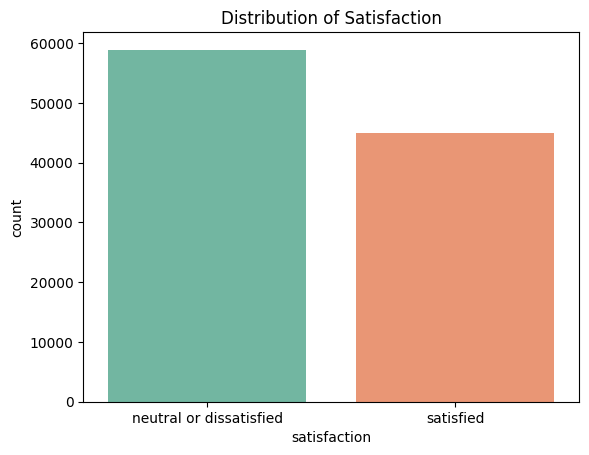

In [188]:
# Distribution of satisfaction
sns.countplot(x='satisfaction', data=df_airline_train, palette ='Set2')
plt.title('Distribution of Satisfaction')
plt.show()

In [189]:
df_airline_train['Type of Travel'].value_counts()

,count
Type of Travel,
Business travel,71655
Personal Travel,32249


<ipython-input-190-5bf6b3063465>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type of Travel', data=df_airline_train, palette ='Set1')


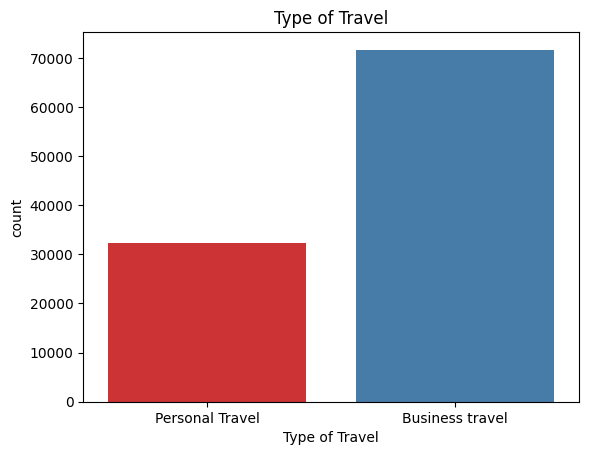

In [190]:
sns.countplot(x='Type of Travel', data=df_airline_train, palette ='Set1')
plt.title('Type of Travel')
plt.show()

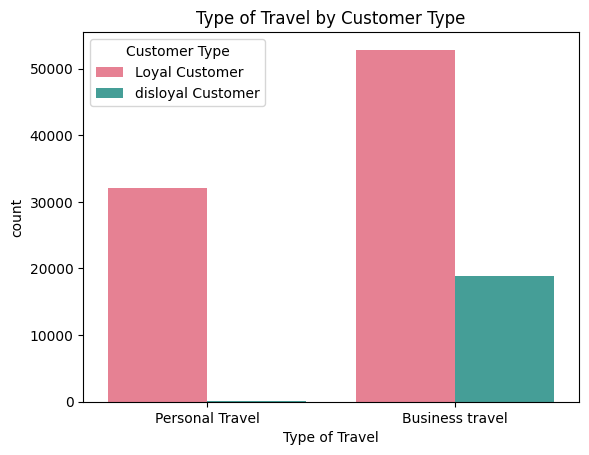

In [191]:
sns.countplot(x='Type of Travel', hue='Customer Type', data=df_airline_train, palette='husl')
plt.title('Type of Travel by Customer Type')
plt.show()

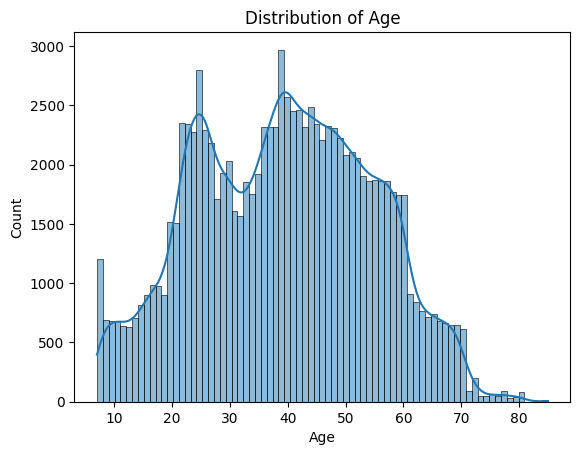

In [192]:
# Distribution of Age
sns.histplot(df_airline_train['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

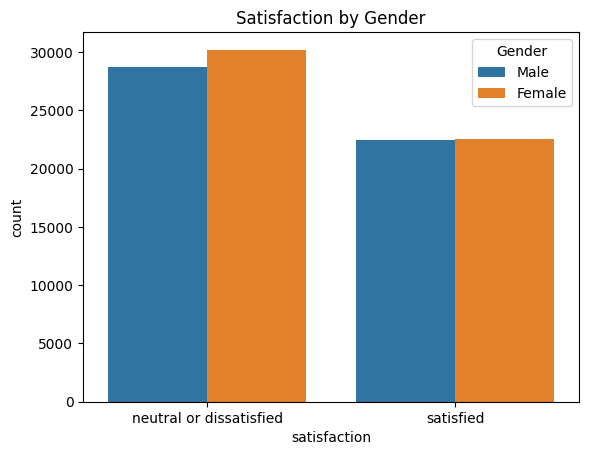

In [193]:
# Satisfaction by Gender
sns.countplot(x='satisfaction', hue='Gender', data=df_airline_train)
plt.title('Satisfaction by Gender')
plt.show()

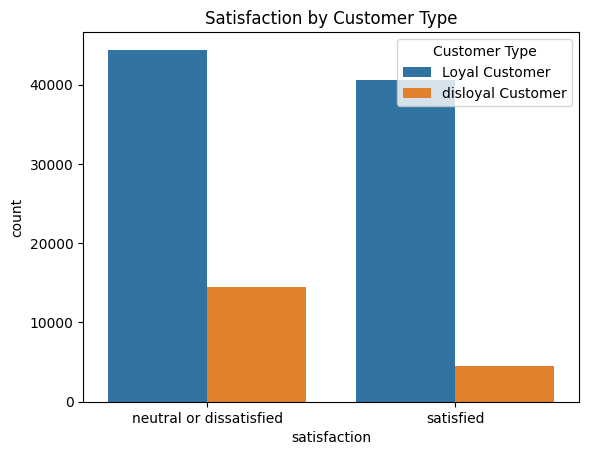

In [194]:
# Satisfaction by Customer Type
sns.countplot(x='satisfaction', hue='Customer Type', data=df_airline_train)
plt.title('Satisfaction by Customer Type')
plt.show()

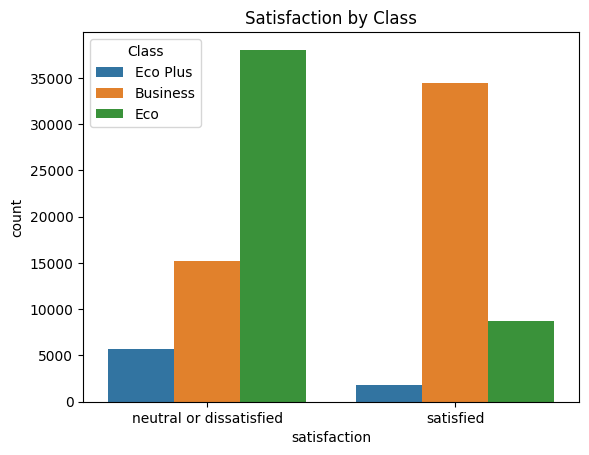

In [195]:
# Satisfaction by Class
sns.countplot(x='satisfaction', hue='Class', data=df_airline_train)
plt.title('Satisfaction by Class')
plt.show()

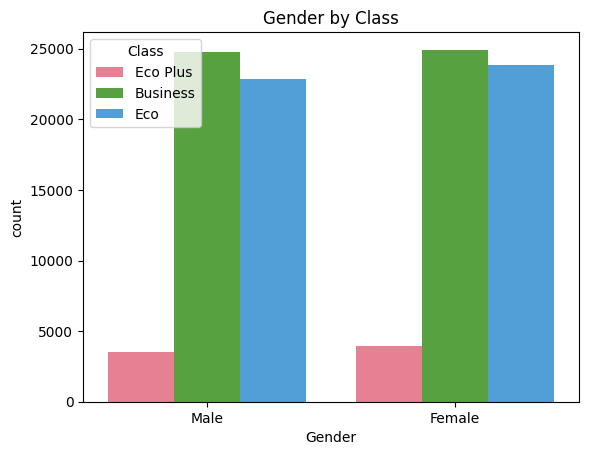

In [196]:
sns.countplot(x='Gender', hue='Class', data=df_airline_train, palette='husl')
plt.title('Gender by Class')
plt.show()

In [197]:
pd.crosstab(df_airline_train['Gender'], df_airline_train['Class'])

Class,Business,Eco,Eco Plus
Gender,,,
Female,24927,23858,3942
Male,24738,22887,3552


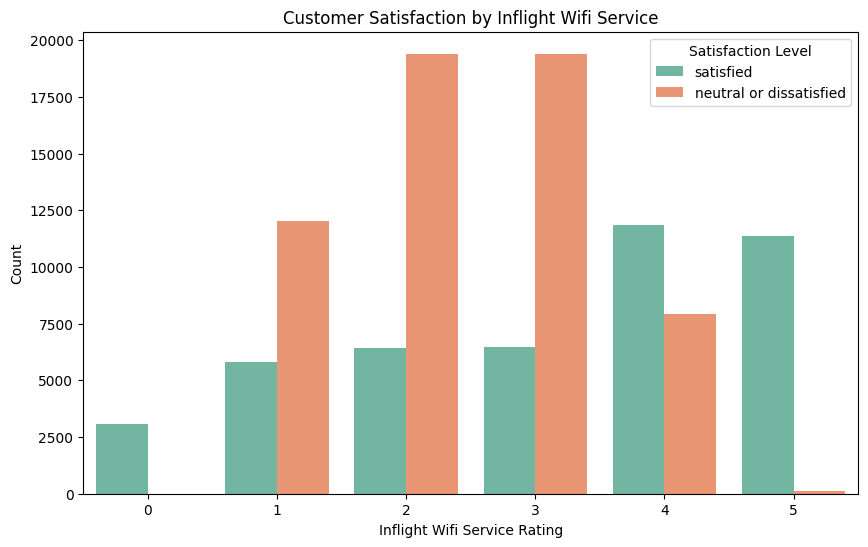

In [198]:
# Create a countplot with customized appearance
plt.figure(figsize=(10, 6))
sns.countplot(data=df_airline_train, x='Inflight wifi service', hue='satisfaction', palette='Set2')
plt.title('Customer Satisfaction by Inflight Wifi Service')
plt.xlabel('Inflight Wifi Service Rating')
plt.ylabel('Count')
plt.legend(title='Satisfaction Level')
plt.show()

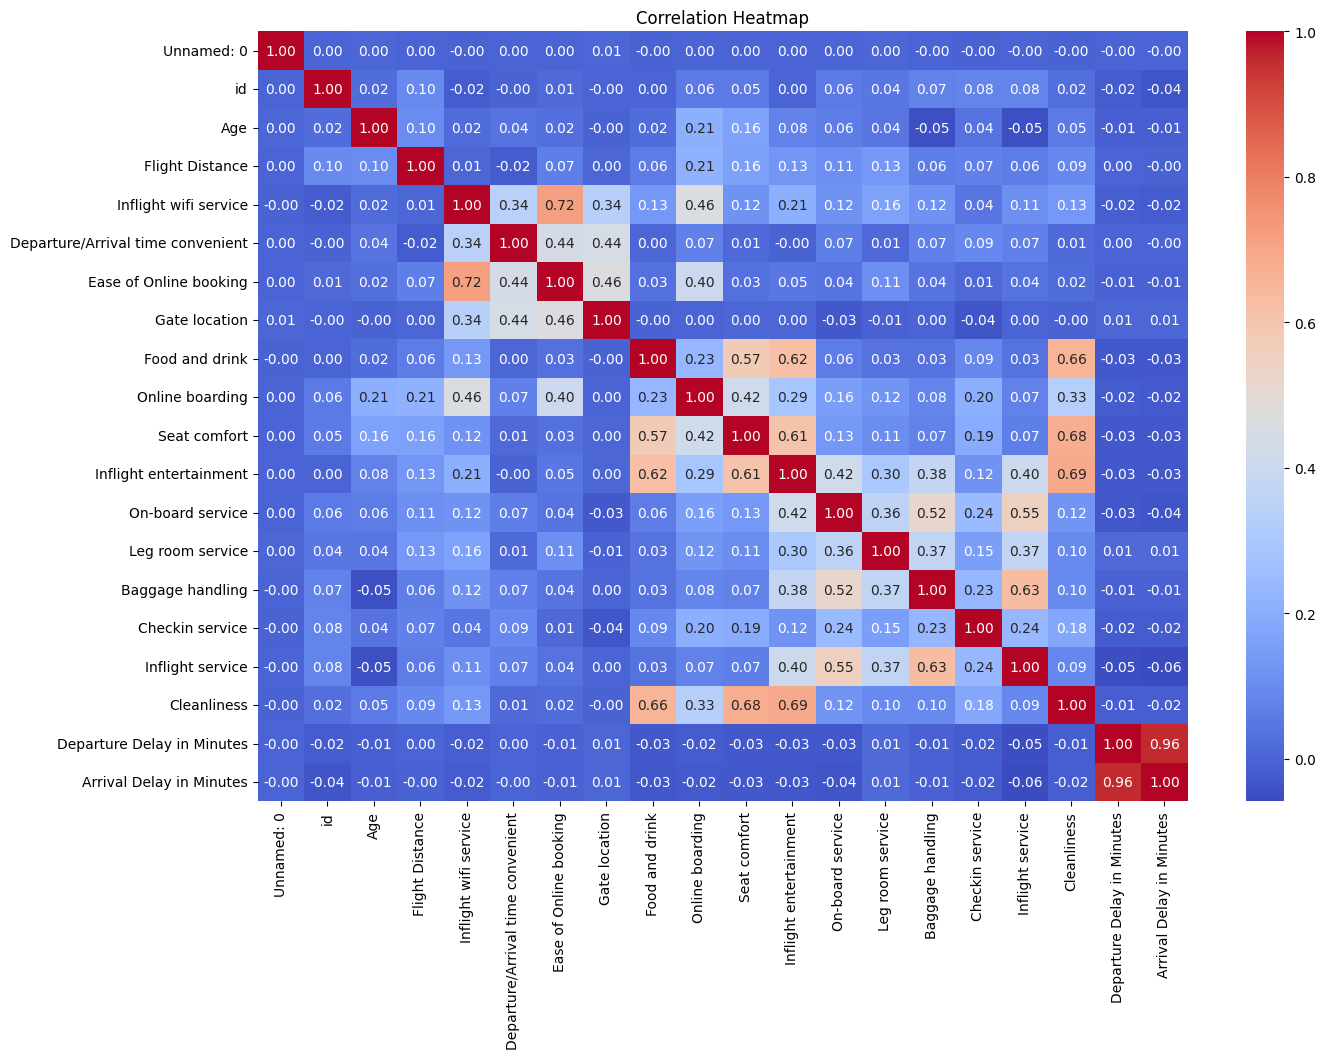

In [199]:
#Correlation Heatmap
# Select only numeric columns
numeric_df = df_airline_train.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Bivariate Analysis

In [200]:
cat_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Inflight service', 'Cleanliness']

In [201]:
df_airline_train[cat_cols] = df_airline_train[cat_cols].astype(object)

In [202]:
cat_columns = df_airline_train.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = df_airline_train.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


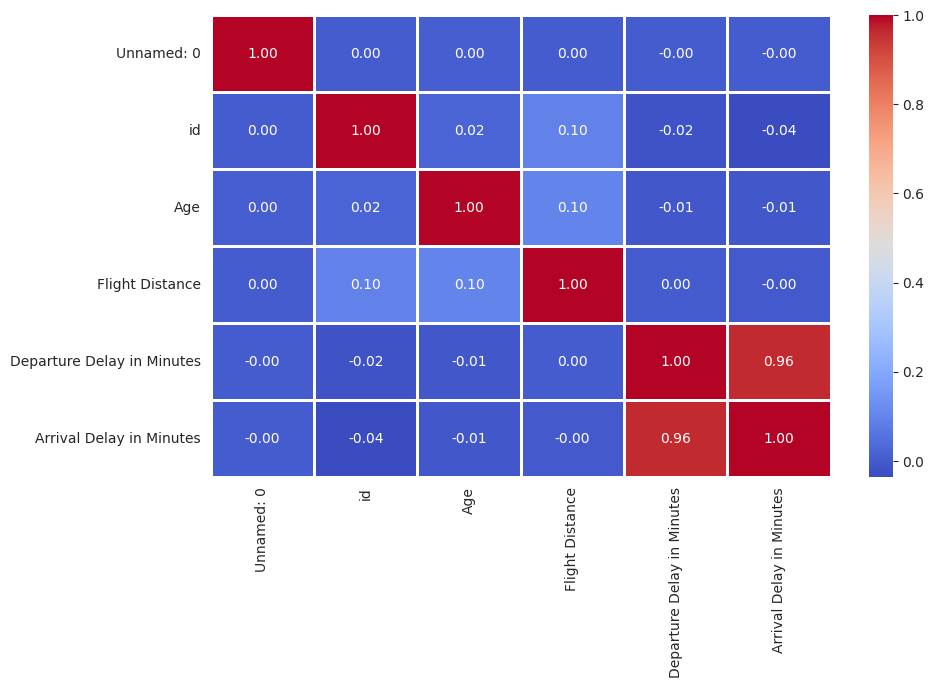

In [203]:
with sns.axes_style('white'):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_airline_train[num_columns].corr(), annot=True, fmt='.2f', linewidths=0.8, cmap="coolwarm")

Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped

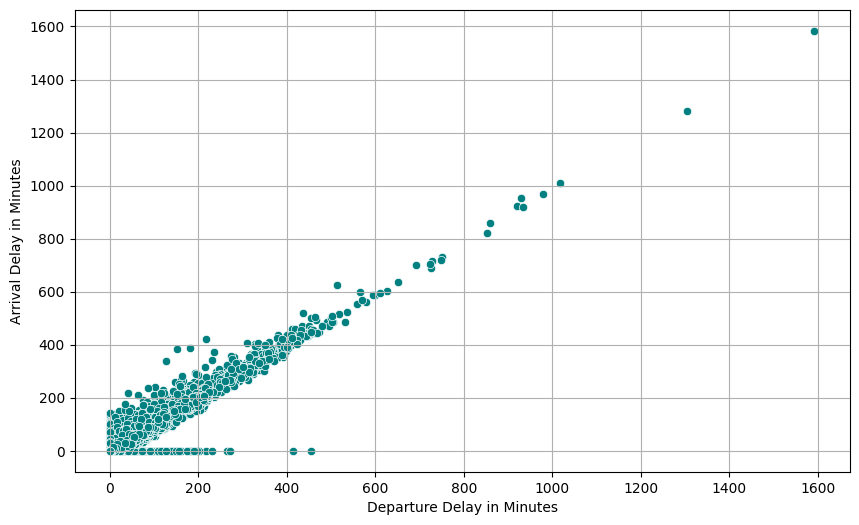

In [204]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df_airline_train, color = 'teal')
plt.grid()
plt.show()

# Feature Engineering

Lot of features were skewed, therefore it will be appropriate to apply log transformation to them

In [205]:
#data transformation
df_airline_train['Flight Distance'] = np.log1p(df_airline_train['Flight Distance'])
#df_airline_test['Flight Distance'] = np.log1p(df_airline_test['Flight Distance'])
#df_airline_test['Arrival Delay in Minutes'] = np.log1p(df_airline_test['Arrival Delay in Minutes'])

In [206]:
df_airline_train['Gender'] = df_airline_train['Gender'].map({'Male' : 0, 'Female' : 1})
df_airline_train['Customer Type'] = df_airline_train['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
df_airline_train['Type of Travel'] = df_airline_train['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df_airline_train['Class'] = df_airline_train['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
df_airline_train['satisfaction'] = df_airline_train['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

# Feature Scaling

In [ ]:
# Split the data into features and target variable
X_train = df_airline_train.drop(['satisfaction','Unnamed: 0','id'], axis = 1)
y_train = df_airline_train.satisfaction

#X_test = df_airline_test.drop(['satisfaction','Unnamed: 0','id'], axis=1)
#y_test = df_airline_test.satisfaction

In [208]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,13,0,1,6.133398,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,0,1,25,1,2,5.463832,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,1,0,26,1,2,7.041412,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,1,0,25,1,2,6.333280,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,0,0,61,1,2,5.370638,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


# Data Modelling

In [209]:
# Initialize KNN classifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [210]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [212]:
# Make predictions on the training and test sets
y_train_pred = KNN.predict(X_train)

In [213]:
# K-Fold cross-validation for accuracy
k = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_score_cv = cross_val_score(KNN, X_train, y_train, scoring='accuracy', cv=k).mean()
print("Accuracy on the train set:", accuracy_score_cv)

Accuracy on the train set: 0.8709289441718597
